# Análise exploratória de dados
 - Conjunto de dados: `Bike Rides` (Mobilidade Urbana)
 - Equipe:
   - José Arthur Gomes Azevedo
   - Aline dos Santos Costa
   - Lara Emily Alves Rocha
   - Camila Roberta Santana da Silva
---

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid", palette="colorblind") # Configuração visual dos gráficos com fundo branco e paleta acessível

palette_dict = {
    'user_gender': {'M': 'skyblue', 'F': 'lightcoral'}, # Definindo as cores: 'M' (azul), 'F' (rosa)
    'ride_late': 'coolwarm',
    'ride_duration': 'Blues',
    'age': 'viridis'
}

In [ ]:
  # @title Leitura do conjunto de dados
url = 'https://raw.githubusercontent.com/omadson/datasets/main/datasets/df_rides.csv' # Importando dados do github
df = pd.read_csv(url)

In [ ]:
df['user_birthdate'] = pd.to_datetime(df['user_birthdate']) # Conversão de tipos (Datas)
df['ride_date'] = pd.to_datetime(df['ride_date'])
df['age'] = (df['ride_date'] - df['user_birthdate']).dt.days // 365 # Criação de uma nova coluna
df = df[(df['age'] > 10) & (df['age'] < 100)]

df_clean = df.dropna(subset=['ride_duration']).copy() # Criação de um dataframe limpo tirando nulos para as análises estatísticas e garantindo uma cópia independente

In [ ]:
# @title Informações iniciais
from IPython.display import Markdown, display

display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informações do dataset"))
display(df.info())

display(Markdown("### Estatíticas descritivas"))
display(df.describe())

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,age
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,46.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,28.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0,49.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0,26.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0,48.0


### Ultimas linhas

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,age
287317,M,1994-01-16,DF,2018-08-31,23:11:42,23:40:20,47 - EQN 410/411,47 - EQN 410/411,28.633333,0.0,24.0
287318,M,1990-04-15,NaN,2018-08-31,23:12:02,23:40:10,47 - EQN 410/411,47 - EQN 410/411,28.133333,0.0,28.0
287319,M,1976-06-19,DF,2018-08-31,23:15:31,23:18:40,34 - Shopping Mall,22 - 102 Sul,3.150000,0.0,42.0
287320,M,1978-01-27,NaN,2018-08-31,23:20:42,23:27:01,24 - Galeria,33 - EQS 104/304,6.316667,0.0,40.0
287321,M,1984-05-27,NaN,2018-08-31,23:21:18,23:25:28,14 - Brasília Shopping,6 - Rodoviária,4.166667,0.0,34.0


### Informações do dataset

<class 'pandas.core.frame.DataFrame'>
Index: 278808 entries, 0 to 287321
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_gender     278470 non-null  object        
 1   user_birthdate  278808 non-null  datetime64[ns]
 2   user_residence  100897 non-null  object        
 3   ride_date       278808 non-null  datetime64[ns]
 4   time_start      278808 non-null  object        
 5   time_end        236569 non-null  object        
 6   station_start   278808 non-null  object        
 7   station_end     278808 non-null  object        
 8   ride_duration   207628 non-null  float64       
 9   ride_late       207628 non-null  float64       
 10  age             278808 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 25.5+ MB


None

### Estatíticas descritivas

,user_birthdate,ride_date,ride_duration,ride_late,age
count,278808,278808,207628.000000,207628.000000,278808.000000
mean,1989-04-03 18:48:57.143841024,2018-05-19 01:30:00.774726400,29.894314,0.098373,28.644293
min,1928-04-08 00:00:00,2018-01-01 00:00:00,3.000000,0.000000,11.000000
25%,1983-12-24 00:00:00,2018-03-29 00:00:00,8.083333,0.000000,21.000000
50%,1992-07-17 00:00:00,2018-05-26 00:00:00,14.183333,0.000000,25.000000
75%,1996-08-21 00:00:00,2018-07-15 00:00:00,33.666667,0.000000,34.000000
max,2007-08-04 00:00:00,2018-08-31 00:00:00,999.483333,1.000000,90.000000
std,NaN,NaN,58.989435,0.297819,9.786063


### Quantidade de valores únicos

,0
user_gender,2
user_birthdate,10893
user_residence,245
ride_date,243
time_start,59889
time_end,59129
station_start,50
station_end,50
ride_duration,11329
ride_late,2


---
A partir das informações iniciais, podemos dizer que:
- O conjunto de dados tem 287322 unidades amostrais com 11 variáveis
- Classificação das variáveis:
  - Quantitativa contínua: `user_birthdate`, `ride_date`, `ride_duration`
  - Qualitativa nominal: `user_gender`, `user_residence`, `time_start`, `time_end`, `station_start`, `station_end`, `ride_late`
  - Qualitativa discreta: `age`



---




## Descrição dos dados

### Dicionário de Dados

| Variável | Descrição | Tipo | Subtipo |
| :--- | :--- | :--- | :--- |
| `user_gender` | Gênero do usuário | Qualitativa | Nominal |
| `user_birthdate` | Data de nascimento do usuário | Quantitativa | Contínua |
| `user_residence` | Estado de residência do usuário | Qualitativa | Nominal |
| `ride_date` | Data em que a viagem ocorreu | Quantitativa | Contínua |
| `time_start` | Horário de início da viagem | Qualitativa | Nominal |
| `time_end` | Horário de término da viagem | Qualitativa | Nominal |
| `station_start` | Nome da estação de partida | Qualitativa | Nominal |
| `station_end` | Nome da estação de destino | Qualitativa | Nominal |
| `ride_duration` | Duração da viagem em minutos | Quantitativa | Contínua |
| `ride_late` | Indica se a viagem foi finalizada com atraso (1) ou não (0) | Qualitativa | Nominal |
| `age` | Idade do usário no momento da corrida | Quantitativa | Discreta |

## Análise univariada

In [ ]:
# @title Resumo estatístico

display(Markdown("### Variáveis Qualitativas"))
display(df.describe(include='object'))

display(Markdown("### Variáveis Quantitativas"))
display(df.describe())

### Variáveis Qualitativas

,user_gender,user_residence,time_start,time_end,station_start,station_end
count,278470,100897,278808,236569,278808,278808
unique,2,245,59889,59129,50,50
top,M,DF,18:05:05,18:50:54,41 - Instituto de Artes,41 - Instituto de Artes
freq,206387,83479,22,19,16791,17671


### Variáveis Quantitativas

,user_birthdate,ride_date,ride_duration,ride_late,age
count,278808,278808,207628.000000,207628.000000,278808.000000
mean,1989-04-03 18:48:57.143841024,2018-05-19 01:30:00.774726400,29.894314,0.098373,28.644293
min,1928-04-08 00:00:00,2018-01-01 00:00:00,3.000000,0.000000,11.000000
25%,1983-12-24 00:00:00,2018-03-29 00:00:00,8.083333,0.000000,21.000000
50%,1992-07-17 00:00:00,2018-05-26 00:00:00,14.183333,0.000000,25.000000
75%,1996-08-21 00:00:00,2018-07-15 00:00:00,33.666667,0.000000,34.000000
max,2007-08-04 00:00:00,2018-08-31 00:00:00,999.483333,1.000000,90.000000
std,NaN,NaN,58.989435,0.297819,9.786063


---
- A maioria dos usuários são `homens` e a estação mais utilizada é a do `Instituto de Artes`.
- Grande parte das viagens acontecem entre `18h05` e `18h50` e a média de duração é de `30 min`
- A média de idade dos usuários é de `28 anos`
- A idade mínima registrada foi `11 anos` e a máxima `90 anos`


---





### Distribuição de variáveis

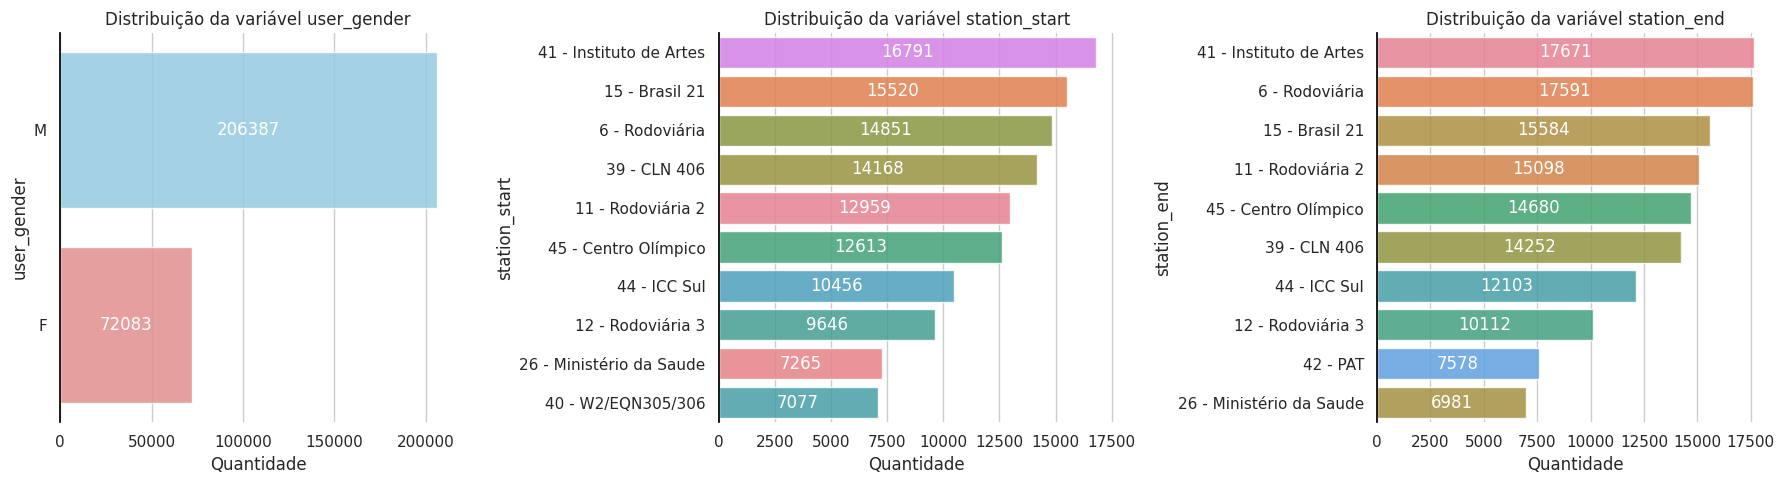

In [ ]:
# @title Variáveis qualitativas

df['start_hour'] = pd.to_datetime(df['time_start'], format='%H:%M:%S').dt.hour

variaveis_qualitativas = [
    'user_gender',
    'station_start',
    'station_end'
]

fig, axes = plt.subplots(figsize=(18, 5), ncols=3, nrows=1)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):


    if variavel in ['station_start', 'station_end']:   # Limitar Top 10 para estações
        order = df[variavel].value_counts().head(10).index
    else:
        order = df[variavel].value_counts().index

    ax = sns.countplot(
        data=df,
        y=variavel,
        ax=axes[i],
        order=order,
        hue=variavel,
        palette=palette_dict.get(variavel, None),
        legend=False,
        alpha=0.85
    )


    for container in ax.containers:
        ax.bar_label(
            container,
            fmt="%d",
            color="white",
            label_type="center"
        )

    ax.set(
        title=f"Distribuição da variável {variavel}",
        xlabel="Quantidade"
    )


    for side in ["bottom", "top", "right"]:    # Remover bordas desnecessárias
        ax.spines[side].set_visible(False)

    ax.spines["left"].set_color("black")

plt.tight_layout()
plt.show()

---
- A maior parte dos usuários são homens (206.387) do que mulheres (72.083)
- A estação com mais chegadas e partidas é a Instituto de Artes
- As variáveis `user_residence`, `time_start` e `time_end` foram ignoradas nesses gráficos pois não geraram boas visualizações


---





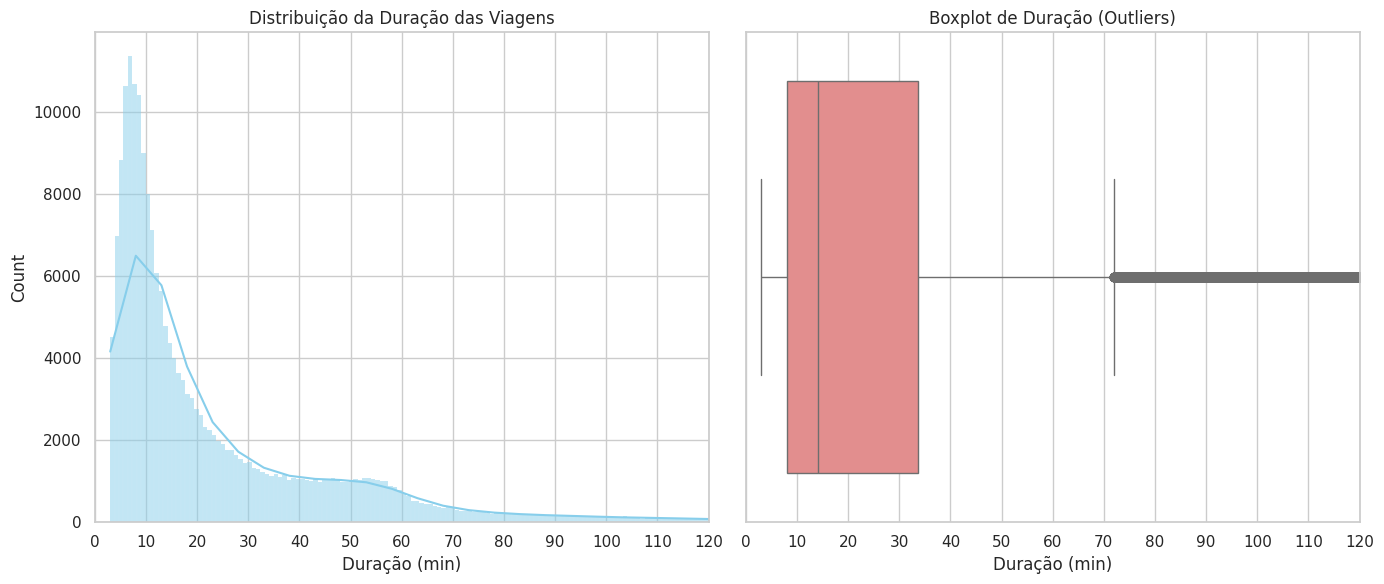

In [ ]:
# @title Variáveis quantitativas

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Histograma da Duração
sns.histplot(df_clean['ride_duration'], kde=True, color='skyblue')
plt.title('Distribuição da Duração das Viagens')
plt.xlabel('Duração (min)')
plt.xlim(0, 120)
plt.xticks(np.arange(0, 121, 10))

plt.subplot(1, 2, 2) # Boxplot para identificar Outliers
sns.boxplot(x=df_clean['ride_duration'], color='lightcoral')
plt.title('Boxplot de Duração (Outliers)')
plt.xlabel('Duração (min)')
plt.xlim(0, 120)
plt.xticks(np.arange(0, 121, 10))

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

---
Distribuição da variável `Duração das Viagens`
- O maior número de viagens são de curta duração
- Existem outras viagens que passam de 100min, elas são consideradas anomalias
- A distribuição é assimétrica para a direita

Distribuição da variável `Duração (Outliers)`
- Observa-se valor discrepante extremo de 999min. Levando em conta que grande parte das viagens são feitas em menos de 60min, esse comportamento pode indicar possível corrida fora do padrão ou erro na finalização da viagem


---




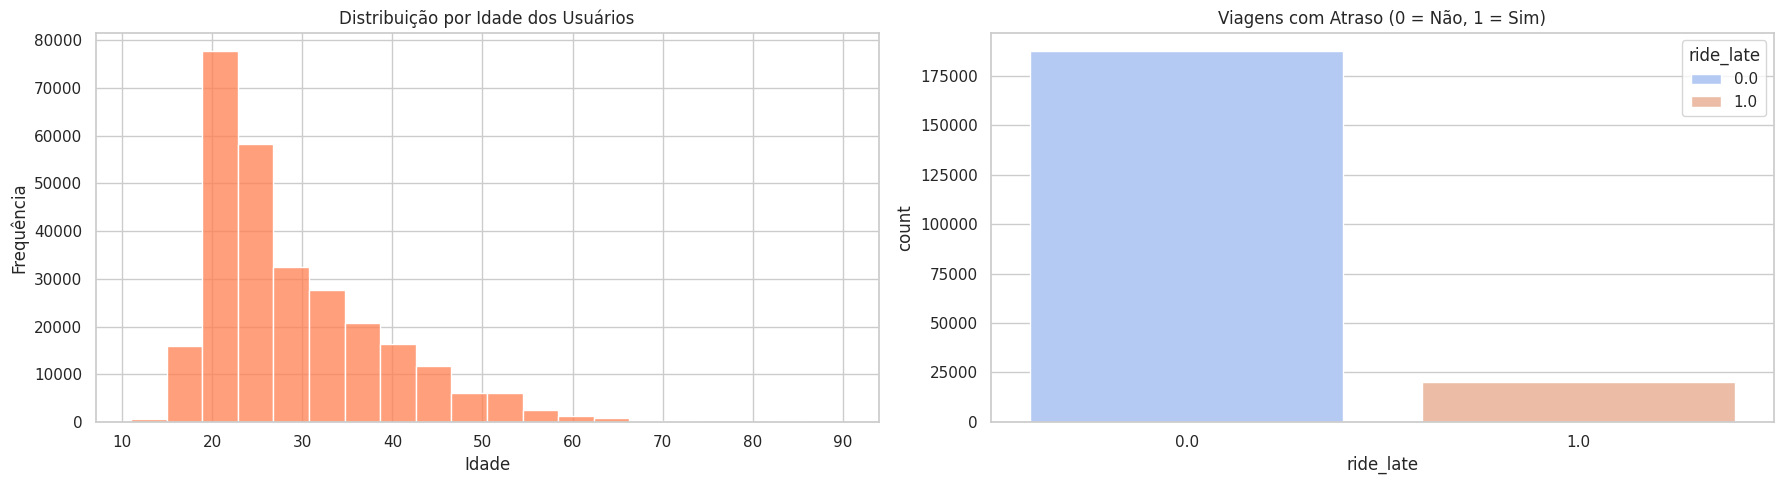

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1) # Contagem por faixa de idade
sns.histplot(df['age'], bins=20, color='coral')
plt.title('Distribuição por Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2) # Contagem de Atrasos
sns.countplot(data=df_clean, x='ride_late', hue='ride_late', palette= palette_dict['ride_late'])
plt.title('Viagens com Atraso (0 = Não, 1 = Sim)')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

---
Distribuição da variável `Idade dos Usuários`
- A maioria dos usuários possuem idades entre 20 à 40 anos
- Existem usuários com mais de 60 anos, porém são considerados anomalias

Distribuição da variável `Viagens com Atraso`
- A maioria das viagens são finalizadas sem atraso


---



In [ ]:
# @title Dados faltantes

df.isnull().sum()

,0
user_gender,338
user_birthdate,0
user_residence,177911
ride_date,0
time_start,0
time_end,42239
station_start,0
station_end,0
ride_duration,71180
ride_late,71180




---
- Foram identificados dados faltantes, principalmente nas variáveis `user_gender`, `user_residence`, `time_end`, `ride_duration`e `ride_late`
- Esses dados ausentes podem interferir nos resultados efetivos das análises, porém foram mantidos e serão considerados na interpretação, levando em conta a suas limitações


---




## Análise Bivariada

### Relação entre variáveis quantitativas

Matriz de Correlação:
                    age  ride_duration  start_hour
age            1.000000       0.019744   -0.084829
ride_duration  0.019744       1.000000    0.035292
start_hour    -0.084829       0.035292    1.000000


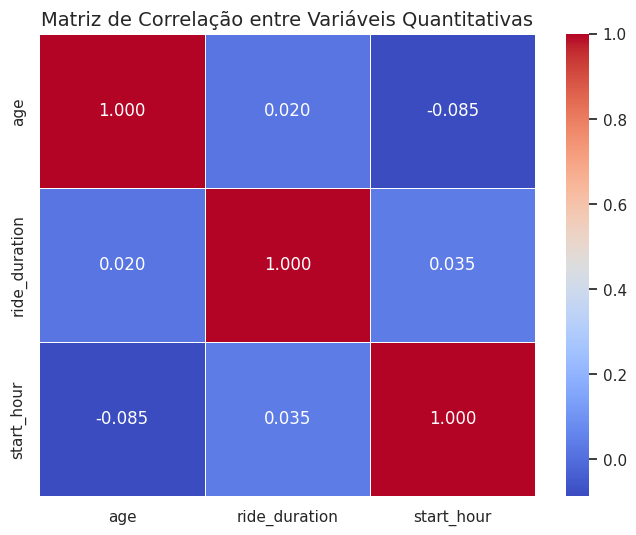

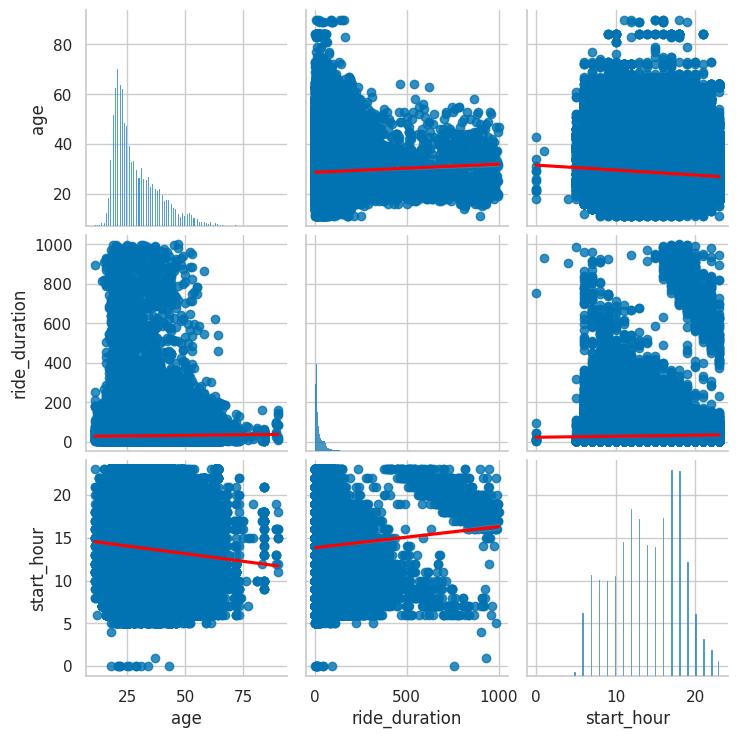

In [ ]:
# @title Matriz de Correlação

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona variáveis quantitativas relevantes
vars_quant = ["age", "ride_duration", "start_hour"]

df_bivariate = df[vars_quant].copy()

# Remove valores faltantes apenas das variáveis analisadas
df_bivariate = df_bivariate.dropna()

# Mostra a matriz de correlação
corr_matrix = df_bivariate.corr(method="pearson")

print("Matriz de Correlação:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".3f",
    linewidths=0.5
)

plt.title("Matriz de Correlação entre Variáveis Quantitativas", fontsize=14)
plt.show()

sns.pairplot(
    df_bivariate,
    kind="reg",
    plot_kws={"line_kws":{"color":"red"}}
)

plt.show()




---


* A duração das corridas apresenta apenas uma leve associação com a idade dos usuários e com o horário de início, indicando que esses fatores possuem baixo poder explicativo de forma isolada.

* Esses resultados sugerem que a duração das corridas é, de certa forma, influenciada por outros fatores não analisados nesta etapa, como localização, distância percorrida, condições operacionais ou perfil comportamental dos usuários.


---



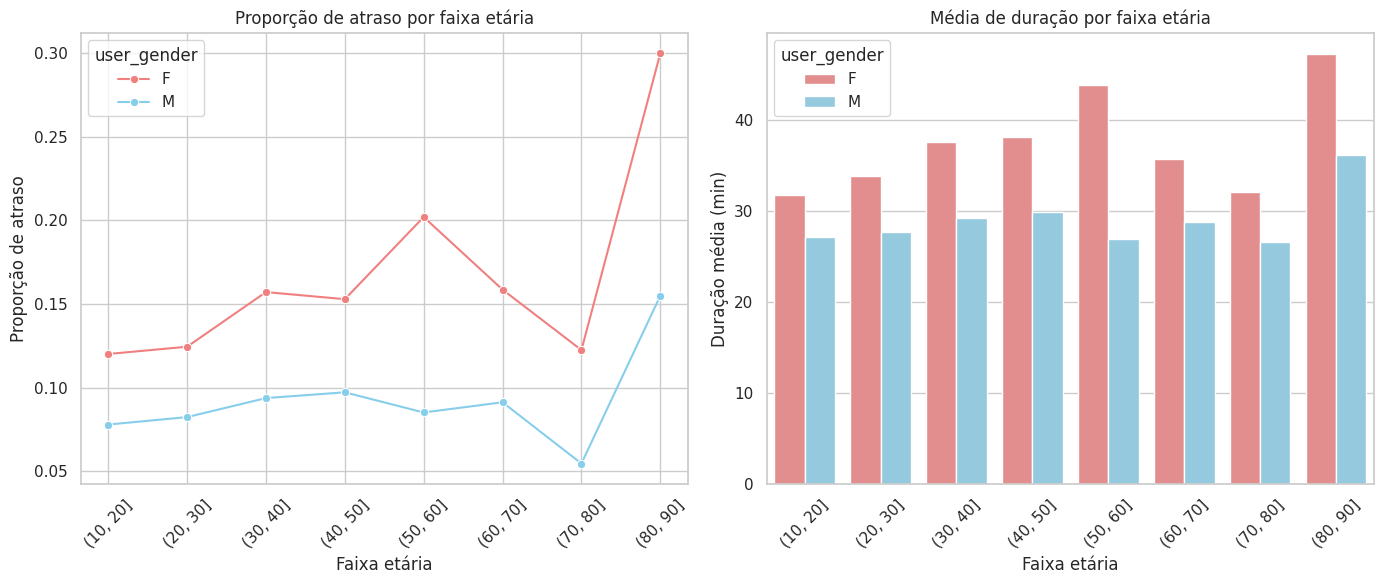

In [ ]:
# @title Comportamento par a par

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

df["age_group"] = pd.cut(df["age"], bins=[10,20,30,40,50,60,70,80,90])    # Criar a coluna 'age_group' para ambos os dataframes antes de plotar
df_clean["age_group"] = pd.cut(df_clean["age"], bins=[10,20,30,40,50,60,70,80,90])

plt.subplot(1, 2, 1)    # Proporção de atraso por faixa etária
proporcao_atraso = df_clean.groupby(["age_group", "user_gender"], observed=True)["ride_late"].mean().reset_index() # Calcular a proporção de atraso por faixa etária E gênero
proporcao_atraso['age_group'] = proporcao_atraso['age_group'].astype(str)  # Converter a coluna 'age_group' para string para evitar o TypeError no lineplot
sns.lineplot(data=proporcao_atraso, x="age_group", y="ride_late", hue="user_gender", palette=palette_dict['user_gender'], marker="o")

plt.xticks(rotation=45)
plt.xlabel("Faixa etária")
plt.ylabel("Proporção de atraso")
plt.title("Proporção de atraso por faixa etária")

plt.subplot(1, 2, 2)     # Relação Idade vs Duração
media_por_idade = df.groupby(["age_group", "user_gender"], observed=True) ["ride_duration"].mean().reset_index()
sns.barplot(data=media_por_idade, x="age_group", y="ride_duration", hue='user_gender', palette=palette_dict['user_gender'])

plt.xticks(rotation=45)
plt.title("Média de duração por faixa etária")
plt.ylabel("Duração média (min)")
plt.xlabel("Faixa etária")

plt.tight_layout()   # Ajusta o layout para evitar sobreposição

plt.show()

---
- Existe uma relação crescente entre as variáveis quantitativas
- A variável `proporção de atraso` varia de maneira crescente em relação à variável `faixa etária`, com queda na faixa `[70,80]`
- A variável `duração média` varia de maneira crescente em relação a variável `faixa etária` quando a variável `gênero` é igual a `F`, com queda entre os intervalos `[60,70]` e `[70,80]`
- A variável `duração média` varia de maneira mais igualitária em relação a variável `faixa etária` quando a variável `gênero` é igual a `M`

---

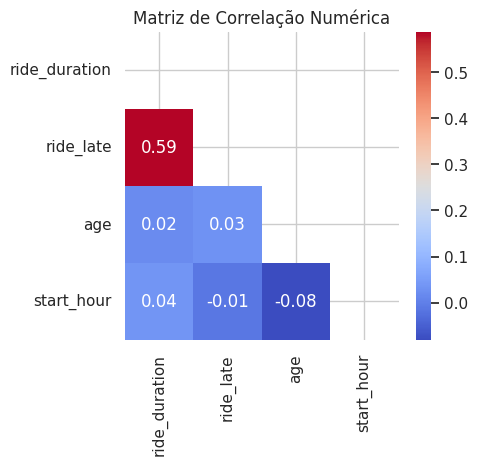

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# @title Correlação

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 2)    # Matriz de Correlação (apenas colunas numéricas)
corr = df.corr(numeric_only=True) # Atribuir a matriz de correlação a 'corr'
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", mask=mask) # Aplicar a máscara para mostrar apenas o triângulo inferior
plt.title('Matriz de Correlação Numérica')

sns.set_style("white")


plt.show()



---
- A relação entre as correlações é:
  - `Corr(ride_duration,ride_late) > Corr(ride_duration,start_hour) > Corr(ride_late,age) > Corr(ride_duration,age) > Corr(ride_late,start_hour) > Corr(age,start_hour)`


---



### Relação entre variáveis qualitativas

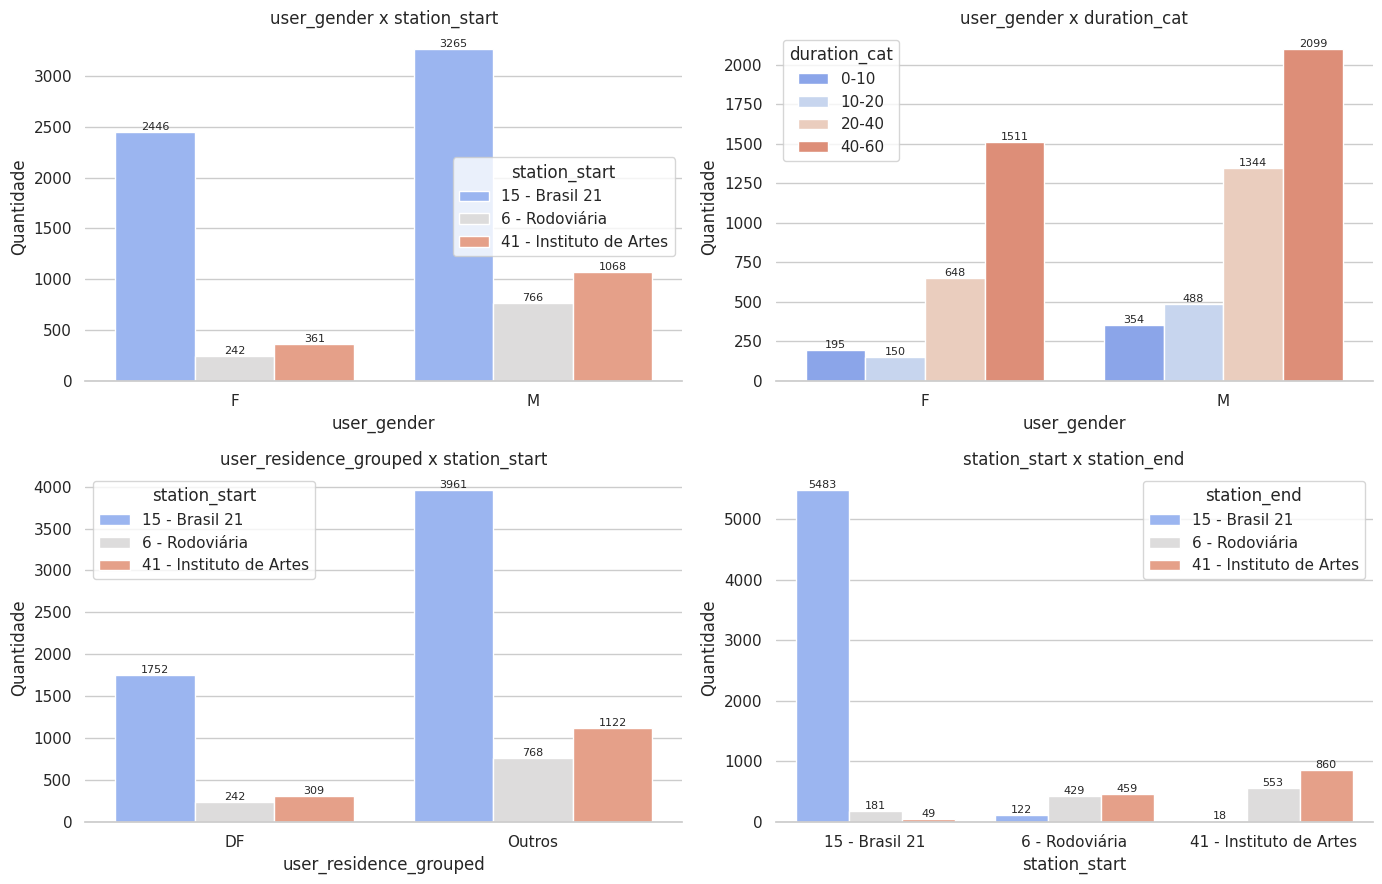

In [ ]:
# @title Contingência

import itertools
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Limitar estações
top_start = df['station_start'].value_counts().nlargest(3).index
top_end = df['station_end'].value_counts().nlargest(3).index

df_plot = df[
    df['station_start'].isin(top_start) &
    df['station_end'].isin(top_end)
].copy()

df_plot['user_residence_grouped'] = df_plot['user_residence'].apply(
    lambda x: 'DF' if x == 'DF' else 'Outros'
)


df_plot['duration_min'] = (
    pd.to_datetime(df_plot['time_end'], format='%H:%M:%S') -
    pd.to_datetime(df_plot['time_start'], format='%H:%M:%S')
).dt.total_seconds() / 60

df_plot = df_plot[df_plot['duration_min'] <= 60]

# Categorizar duração
bins = [0, 10, 20, 40, 60]
labels = ['0-10', '10-20', '20-40', '40-60']
df_plot['duration_cat'] = pd.cut(df_plot['duration_min'],
                                 bins=bins,
                                 labels=labels)

combinacoes = [
    ('user_gender', 'station_start'),
    ('user_gender', 'duration_cat'),
    ('user_residence_grouped', 'station_start'),
    ('station_start', 'station_end')
]

n = len(combinacoes)

fig, axes = plt.subplots(
    figsize=(14, 3 * (n // 2 + 1)),
    ncols=2,
    nrows=(n // 2 + n % 2),
    squeeze=False
)

axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):

    ax = sns.countplot(
        data=df_plot,
        x=var_1,
        hue=var_2,
        ax=axes[i],
        palette='coolwarm'
    )

    for container in ax.containers:
        ax.bar_label(container, fmt="%d", fontsize=8)

    ax.set(title=f"{var_1} x {var_2}", ylabel="Quantidade")

    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

plt.tight_layout()
plt.show()



---
- A maioria dos usuários inicia a viagem na estação `15 - Brasil 21`
- Usuários do gênero `M` fazem mais viagens com duração de `20-40min` do que usuários do gênero `F`
- Usuários com residência fora do `DF` fazem mais viagens partindo da estação `41- Instituto de Artes`
- Poucos usuários fazem viagens partindo da estação `15 - Brasil 21` e finalizando na estação `41 - Insituto de
Artes`


---




### Relação entre variáveis quantitativas e qualitativas

Tabela de Contingência:
ride_late       0.0    1.0     All
user_gender                       
F             46740   7291   54031
M            140248  13111  153359
All          186988  20402  207390


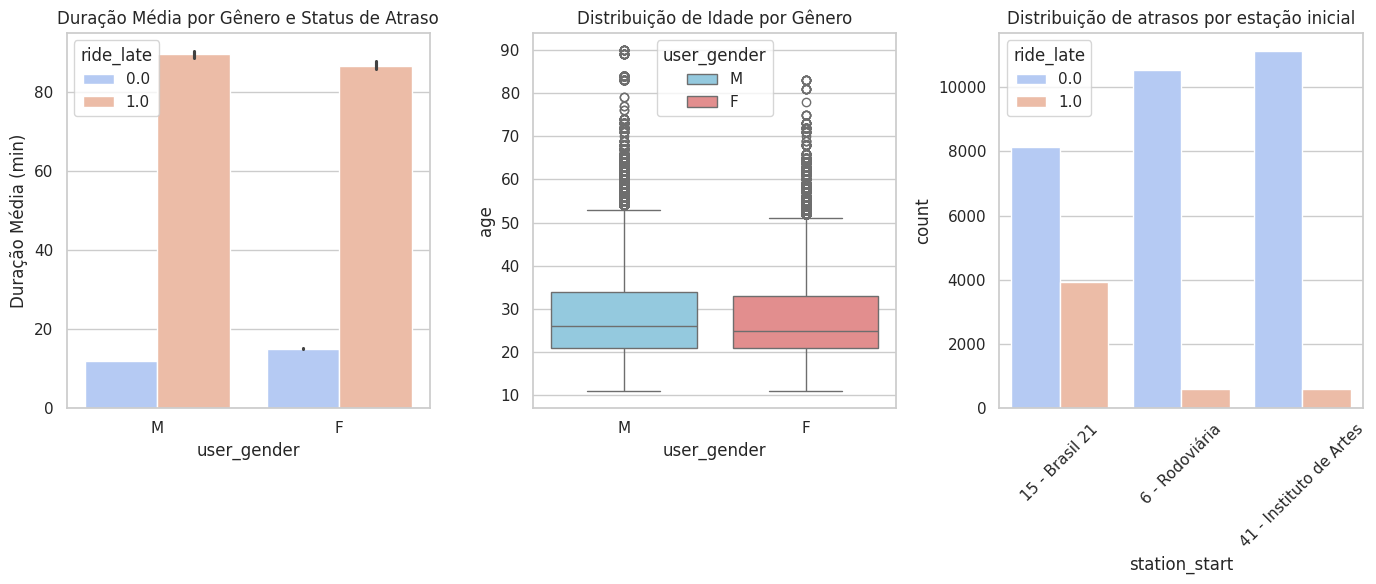

60.016666666666666
60.0


In [ ]:
# @Distribuição Relativa

plt.figure(figsize=(14, 6))

# Remove valores faltantes apenas dessas variáveis
df_cat = df[["user_gender", "ride_late"]].dropna()

contingency_table = pd.crosstab(
    df_cat["user_gender"],
    df_cat["ride_late"],
    margins=True
)

print("Tabela de Contingência:")
print(contingency_table)

contingency_percent = pd.crosstab(
    df_cat["user_gender"],
    df_cat["ride_late"],
    normalize="index"
) * 100

top_stations = df["station_start"].value_counts().head(3).index
    # Seleciona apenas top 10 estações para melhor visualização


df_station = df[
    (df["station_start"].isin(top_stations)) &
    (df["ride_late"].notna())
]


plt.subplot(1, 3, 1)
sns.barplot(data=df_clean, x="user_gender", y="ride_duration", hue="ride_late", estimator=np.median, palette=palette_dict['ride_late']) # Duração por gênero dividida por status de atraso
plt.title('Duração Média por Gênero e Status de Atraso')
plt.ylabel('Duração Média (min)')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='user_gender', y='age', hue='user_gender', palette=palette_dict['user_gender']) # Distribuição de usuários por idade e gênero
plt.title('Distribuição de Idade por Gênero')

plt.subplot(1, 3, 3)
sns.countplot(
    data=df_station,
    x="station_start",
    hue="ride_late",
    palette=palette_dict['ride_late']
)

plt.title("Distribuição de atrasos por estação inicial")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Qual o menor tempo de viagem que gerou atraso?
print(df[df['ride_late'] == 1]['ride_duration'].min())

# Qual o maior tempo de viagem que NÃO gerou atraso?
print(df[df['ride_late'] == 0]['ride_duration'].max())



---


* Os resultados indicam que a maioria das corridas foi
realizada sem atraso, independente do gênero do usuário. A distribuição percentual apresenta comportamento semelhante entre os grupos, então, podemos inferir que o gênero não exerce influência significativa sobre a ocorrência de atrasos.

* A análise da relação entre a estação de início e a ocorrência de atrasos revela variações na frequência de atrasos entre diferentes estações.
* Esse comportamento supõe que fatores operacionais, logísticos ou relacionados à demanda podem influenciar a ocorrência de atrasos em determinadas localidades.

* A maioria dos usuários, de ambos os gêneros, se concentram na faixa etária `20 a 40 anos`. Idades superiores à `60 anos` serão consideradas como anomalias.
---



## Análise Multivariada

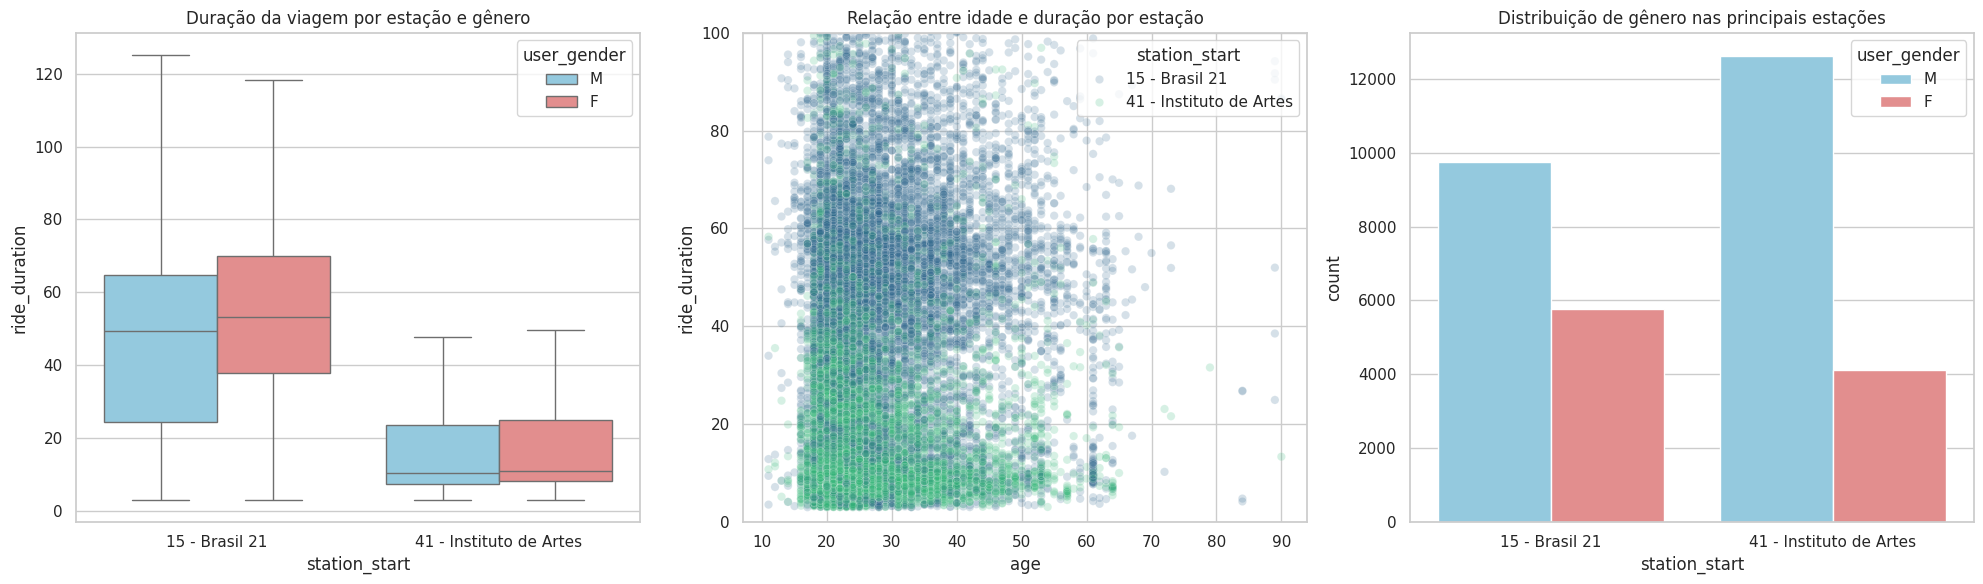

In [ ]:
# @title Relações entre duração da viagem considerando Gênero, Idade e Estação

top3 = df["station_start"].value_counts().nlargest(2).index
df_top3 = df[df["station_start"].isin(top3)]

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_top3, x="station_start", y="ride_duration", hue="user_gender", palette=palette_dict['user_gender'], showfliers=False)  # relação duração da viagem x principais estações de partida x gênero
plt.title("Duração da viagem por estação e gênero")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_top3, x="age", y="ride_duration", hue="station_start", palette=palette_dict['age'], alpha=0.2) # relação entre idade x gênero x principais estações de partida
plt.ylim(0, 100)   # limite de visualização
plt.title("Relação entre idade e duração por estação")

plt.subplot(1, 3, 3)
sns.countplot(data=df_top3, x="station_start", hue="user_gender", palette=palette_dict['user_gender'] ) # relação entre gênero x principais estações
plt.title("Distribuição de gênero nas principais estações")

plt.tight_layout()
plt.show()




---
- Os dados sugerem que as viagens apresentam uma duração menor quando parte da estação `41 - Instituto de Artes`
- Observa-se uma tendência de viagens mais curtas entre os usuários da faixa etária `20 a 40 anos` na estação `Instituto de Artes` e viagens mais longas na estação `Brasil 21`
- Os usuários do gênero `M` são maioria na estação `Instituto de Artes`, assim como na estação `Brasil 21`, porém percebe-se que na estação `Brasil 21`, os usuários do gênero `F` apresentam um leve aumento


---



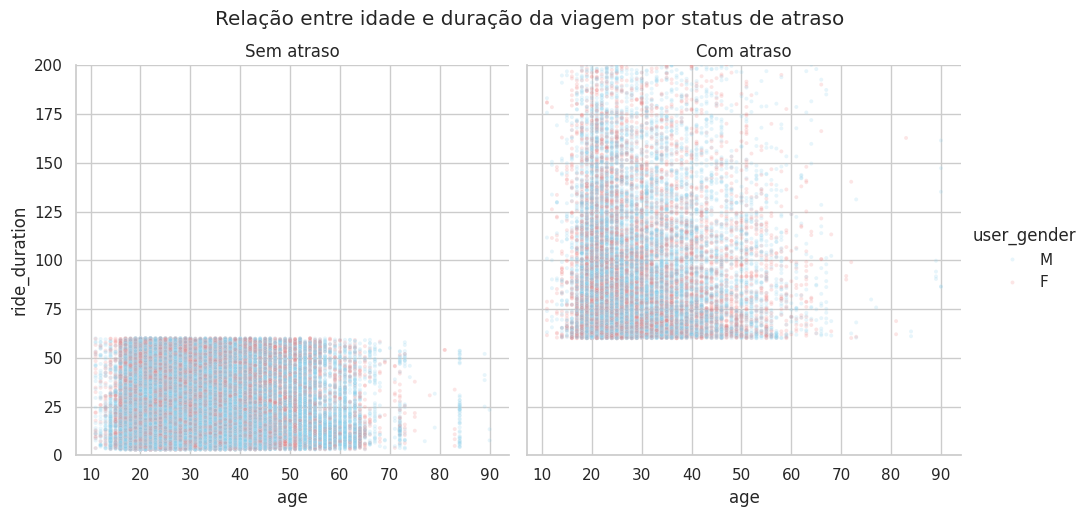

In [ ]:
# @title Cruzando Idade, Duração, Gênero e Atraso no mesmo gráfico

g = sns.relplot(
    data=df_clean,
    x='age',
    y='ride_duration',
    hue='user_gender',
    col='ride_late',
    kind='scatter',
    palette=palette_dict['user_gender'],
    alpha=0.2,
    s=8
)

g.set(ylim=(0, 200))

g.fig.suptitle(
    "Relação entre idade e duração da viagem por status de atraso",
    y=1.03
)

g.axes[0][0].set_title("Sem atraso")
g.axes[0][1].set_title("Com atraso")

plt.show()




---
- Não é possível identificar uma relação clara entre idade e duração da viagem, ainda que a maior concentração de usuários esteja na faixa etária entre `20 a 40 anos`
- Viagens com atraso apresentam duração relativamente maior quando comparadas à viagens sem atraso
- Os usuários do gênero `M` são a maioria em ambas classificações de `ride_late`







---
## Sumário de insights e hipóteses

Após a análise exploratória dos dados de mobilidade urbana (`Rides`), concluímos que:

1.  **Perfil do Usuário:**
    - A base é predominantemente masculina (aprox. 74% dos usuários) e jovem, com a maior concentração na faixa etária de 20 a 30 anos.
    - A estação "Instituto de Artes" é o principal destino de partidas e chegadas, o que sugere uso predominante por público universitário.
    - Devido aos dados faltantes em relação a variável `user_residence`, não é possível definir com exatidão a UF de residência da maioria dos usuários, visto que no gráfico de contigência, a maior parcela está classificada como usuários de outros estados.

2.  **Comportamento de Viagem:**
    - As viagens são majoritariamente curtas (média de 30 min).
    - Viagens acima de 100 minutos são raras e classificadas como *outliers* (anomalias), chegando a valores extremos como 999 minutos, o que indica possíveis bugs de registro ou uso indevido como atraso na devolução de bicicletas.
    - Observa-se que viagens mais curtas se concentram na estação `Instituto de Artes` enquanto a estação `Brasil 21` apresenta viagens com maior duração. Levando em consideração que o Instituto de Artes está localizado em uma região universitária e a Brasil 21 em uma região hoteleira, isso pode indicar perfis diferentes de uso, possivelmente relacionados a deslocamentos de estudantes e de turistas.

3.  **Atrasos e Correlações:**
    - A grande maioria das devoluções de bicicleta ocorre dentro do prazo (`ride_late = 0`).
    - O gráfico de Duração Média por Gênero e Status de Atraso mostra que em ambos os Gêneros viagens com Duração média acima de 120 minutos( 2 hora ) tem o Status de atraso, com uma pequena investigação nota-se que o limite de uso é de 60 minutos, e que qualquer valor acima disso é um atraso na devolução
    - A análise bivariada mostrou que a proporção de atrasos varia conforme a faixa etária, tendo picos em idades mais avançadas de ambos os gêneros o que pode indicar dificuldades motoras e outras limitações.
    - Mulheres apresentam uma variação maior na duração média das viagens aos 50 e 80 anos, enquanto a duração média dos homens se mantém mais estável entre as faixas etárias.

4.  **Limitações:**
    - A presença de dados faltantes em `user_gender` e `user_residence` exige cautela em análises demográficas mais profundas, mas não inviabiliza a identificação dos padrões gerais de uso.